In [59]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.mplot3d import Axes3D

In [49]:
def draw_beta(a, b):
    """
    Draw the Beta distribution with parameters a, b.
    
    a (float): the first parameter of the Beta
    b (float): the second parameter of the Beta
    
    return: a plot of the Beta distribution
    """
    x = scipy.stats.beta.rvs(a, b, size=10000)
    plt.figure(figsize=(9, 6))
    sns.distplot(x)
    plt.xlabel("x")
    plt.ylabel("kernel density estimate")
    plt.savefig(f"images/beta_example.png")
    plt.show()

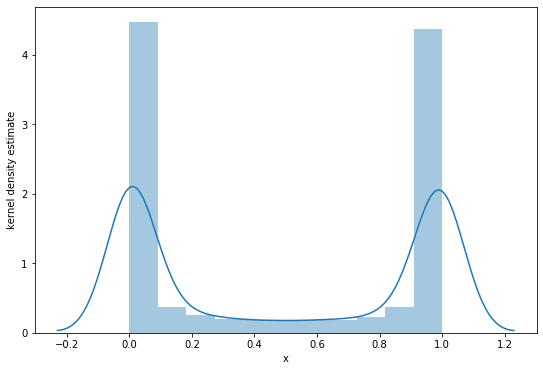

In [50]:
draw_beta(0.1,0.1)

In [116]:
def draw_multimodal(stds):
    """
    Draw a multimodal distribution.
    
    stds (float list): the list of standard deviations
    for each blob
    
    return: a drawing of a multimodal distribution
    """
    
    X, truth = make_blobs(n_samples=500, centers=len(stds), 
                          cluster_std = stds, 
                          random_state=93)
    
    # Extract x and y
    x = X[:, 0]
    y = X[:, 1]
    
    deltaX = (max(x) - min(x)) / 10
    deltaY = (max(y) - min(y)) / 10
    
    xmin = min(x) - deltaX
    xmax = max(x) + deltaX
    
    ymin = min(y) - deltaY
    ymax = max(y) + deltaY
        
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = scipy.stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    
    fig = plt.figure(figsize=(9, 6))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='Blues', edgecolor='none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('PDF')
    ax.view_init(30, 30)
    plt.savefig("images/multimodal_example.png")

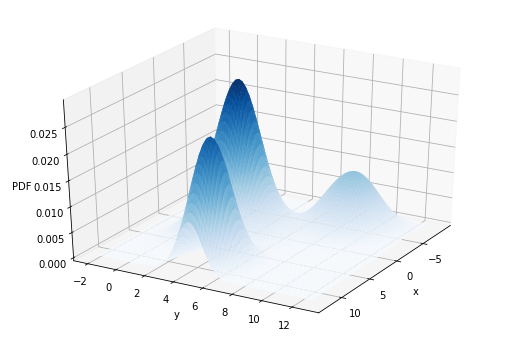

In [117]:
draw_multimodal([1.75, 1.25, 0.5, 0.25])